# Internship Final project
# Anuj Kumar(90161)

# Project Title: Laptop Price Prediction 

# Objective:
Laptop Price prediction uses an algorithm to analyze a product or service based on its characteristics, demand, and current market trends. Then the software sets a price at a level it predicts will both attract customers and maximize sales.

# Steps and Tasks :

### Step 1 : Reading and understanding of data

### Step 2 : Data cleaning and Preparation

### Step 3 : Visualizing the data

### Step 4 : Deriving new features

### Step 5 : Train-Test Split and feature scaling

### Step 6 : Model Building

### Step 7 : Accuracy and Evaluation

In [4]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


# Step 1 : Reading and understanding of data

In [5]:
#import the library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# read csv file
df=pd.read_csv("C:\\Users\\Dell\\ML Project\\laptop_data.csv")

In [8]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


# Step 2 : Data cleaning and Preparation

In [9]:
# finding the shape of data
df.shape

(1303, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [13]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [14]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [15]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [16]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [17]:
# Convert 'Ram' column to int32
df['Ram']=df['Ram'].astype('int32')

# Convert 'Weight' column to float32
df['Weight']=df['Weight'].astype('float32')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# Step 3 : Visualizing the data

<Axes: xlabel='Price', ylabel='Density'>

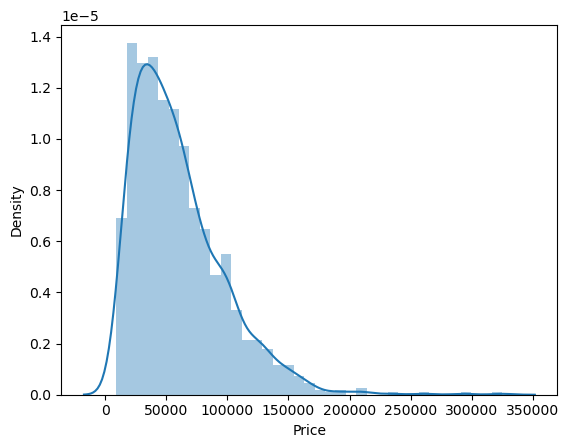

In [19]:
# Create a distplot for the 'Price' column
sns.distplot(df['Price'])

Data is Skewed, it is positive or right skew.


<Axes: >

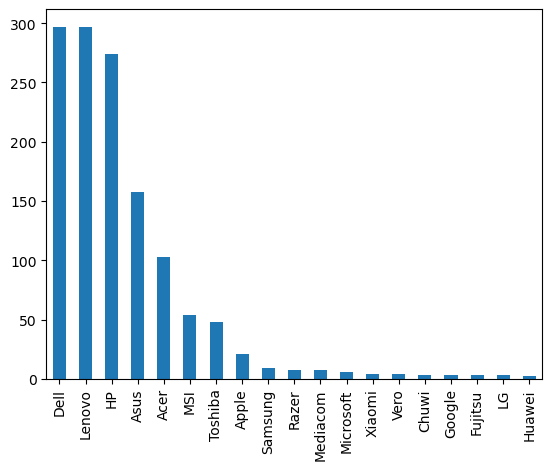

In [20]:
# Create a bar plot of the value counts for the 'Company' column
df['Company'].value_counts().plot(kind='bar')

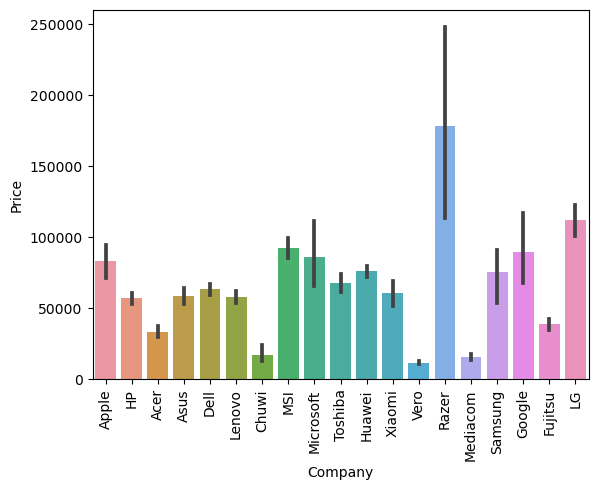

In [21]:

# Create a bar plot using with 'Company' on the x-axis and 'Price' on the y-axis.
sns.barplot(x=df['Company'],y=df['Price'])

# Rotate the x-axis labels vertically for better readability.
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

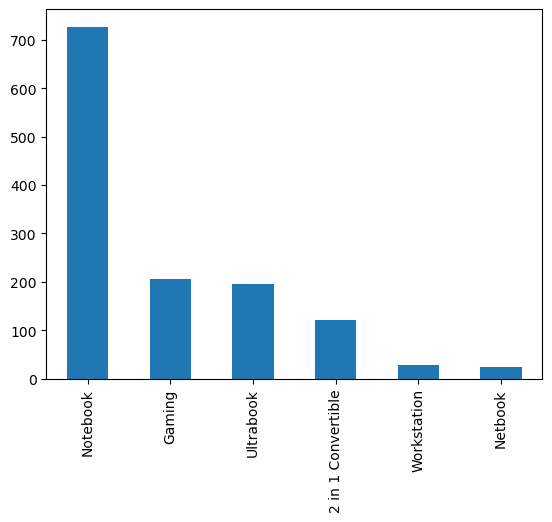

In [22]:
# create a bar plot using TypeName
df['TypeName'].value_counts().plot(kind='bar')

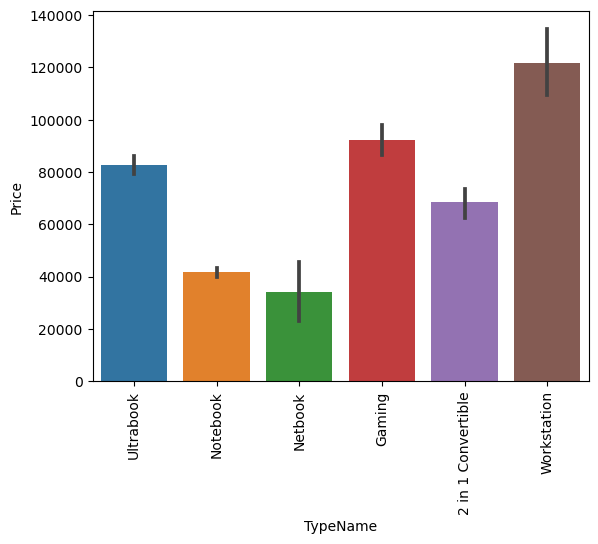

In [23]:
# Create a bar plot using Seaborn, with 'TypeName' on the x-axis and 'Price' on the y-axis.
sns.barplot(x=df['TypeName'],y=df['Price'])

# Rotate the x-axis labels vertically for better readability.
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

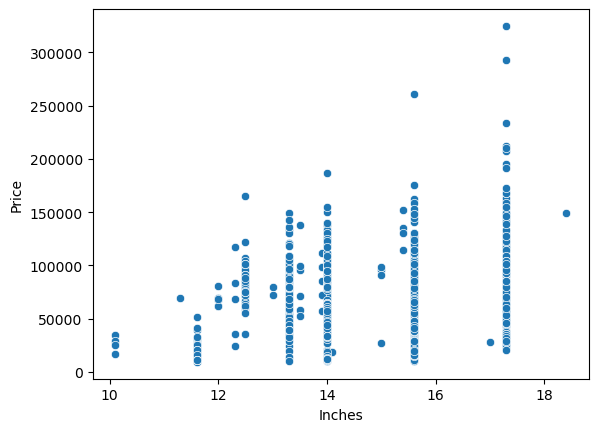

In [24]:
#clculate the scatterplot
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [25]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [26]:
# The lambda function checks if the string 'Touchscreen' is present in each 'ScreenResolution' value.
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

<Axes: >

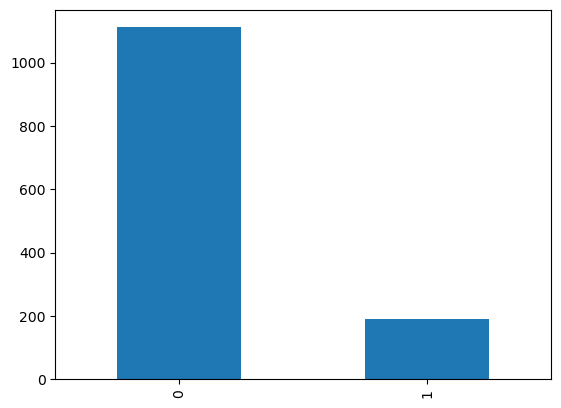

In [27]:
df['Touchscreen'].value_counts().plot(kind='bar')

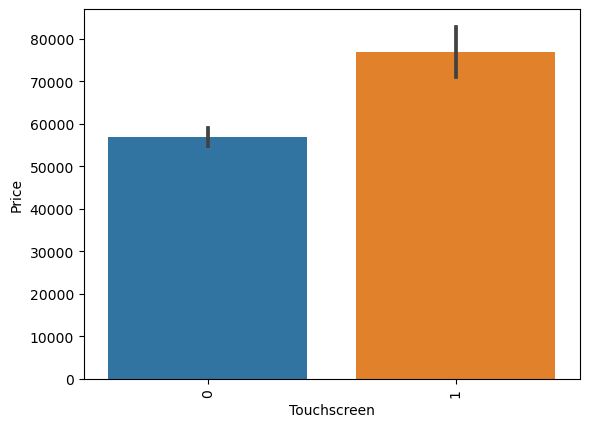

In [28]:
# visualize the relationship between the 'Touchscreen' (0 or 1) and 'Price'.
sns.barplot(x=df['Touchscreen'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [29]:
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

# Step 4 : Deriving new features

In [30]:
new =df['ScreenResolution'].str.split('x',n=1,expand=True)

In [31]:
df['X_res']=new[0]
df['Y_res']=new[1]

In [32]:
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d\.?\d+)').apply(lambda X:X[0])

In [33]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768


In [34]:
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')

In [35]:
df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [36]:
df['PPI']=(((df['X_res']**2) + (df['X_res']**2))**0.5/df['Inches']).astype('float')

In [37]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [38]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [39]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,272.209528
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,153.117859
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,174.057054
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,264.476303
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,272.209528


In [40]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [41]:
df['Cpu Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [42]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,272.209528,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,153.117859,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,174.057054,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,264.476303,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,272.209528,Intel Core i5


In [43]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text =='Intel Core i5' or text =='Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [44]:
df['Cpu brand']=df['Cpu Name'].apply(fetch_processor)

In [45]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,272.209528,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,153.117859,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,174.057054,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,264.476303,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,272.209528,Intel Core i5,Intel Core i5


In [46]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [47]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,272.209528,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,153.117859,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,174.057054,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,264.476303,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,272.209528,Intel Core i5


<Axes: >

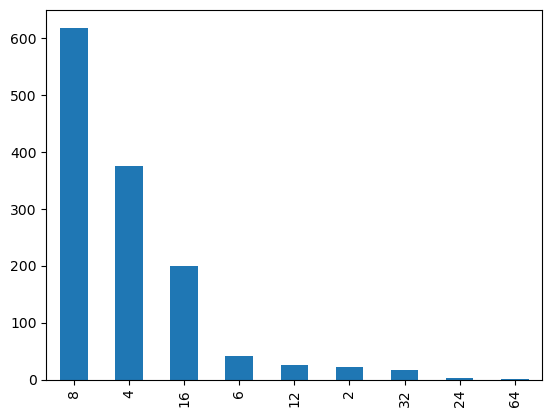

In [48]:
df['Ram'].value_counts().plot(kind='bar')

In [49]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [50]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [51]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
638,Lenovo,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 620,Windows 10,1.37,93635.3376,1,1,204.157146,Intel Core i7,0,256,0,0
1253,Lenovo,Notebook,8,256 SSD,Intel HD Graphics 520,Windows 10,1.90,57116.1600,0,1,193.949289,Intel Core i5,0,256,0,0
819,Dell,Notebook,4,500 HDD,Intel HD Graphics 520,Windows 10,1.76,40226.4000,0,0,137.986838,Intel Core i5,500,0,0,0
227,Asus,Notebook,8,256 SSD,Nvidia GeForce 920MX,Windows 10,2.00,40972.3200,0,0,174.057054,Intel Core i5,0,256,0,0
1189,Acer,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,4.20,138474.7200,0,1,156.953181,Intel Core i7,1000,256,0,0


In [52]:
df.drop(columns='Memory',inplace=True)

In [53]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,272.209528,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,153.117859,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,174.057054,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,264.476303,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,272.209528,Intel Core i5,0,256,0,0


In [54]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.474973
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [55]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [56]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,272.209528,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,153.117859,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,174.057054,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,264.476303,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,272.209528,Intel Core i5,0,256


In [57]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [58]:
df['Gpu Brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [59]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,272.209528,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,153.117859,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,174.057054,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,264.476303,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,272.209528,Intel Core i5,0,256,Intel


In [60]:
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

In [61]:
df=df[df['Gpu Brand']!='ARM']

In [62]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,272.209528,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,153.117859,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,174.057054,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,264.476303,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,272.209528,Intel Core i5,0,256,Intel


In [63]:
df.drop(columns=['Gpu'],inplace=True)

In [64]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,272.209528,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,153.117859,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,174.057054,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,264.476303,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,272.209528,Intel Core i5,0,256,Intel


In [65]:
#counts the occurrences of unique values in the 'OpSys' column.
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

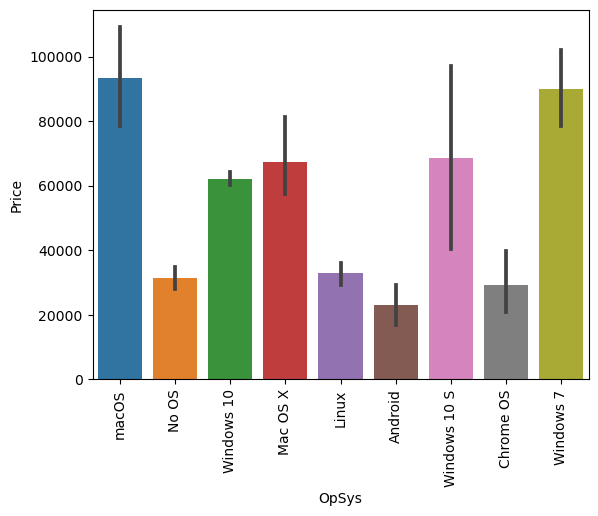

In [66]:
#checking the relation between opsys and price
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [67]:
def cat_os(inp):
  # Check if the input 'inp' matches any of the Windows operating system variations.

    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10':
    # Check if the input 'inp' matches any of the macOS operating system variations.S':
        
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [68]:
df['os']=df['OpSys'].apply(cat_os)

In [69]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,272.209528,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,153.117859,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,174.057054,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,264.476303,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,272.209528,Intel Core i5,0,256,Intel,Mac


In [70]:
df.drop(columns=['OpSys'],inplace=True)

In [71]:
# drop the company and typename
df.drop(["Company","TypeName"], axis=1)

,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu Brand,os
0,8,1.37,71378.6832,0,1,272.209528,Intel Core i5,0,128,Intel,Mac
1,8,1.34,47895.5232,0,0,153.117859,Intel Core i5,0,0,Intel,Mac
2,8,1.86,30636.0000,0,0,174.057054,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,16,1.83,135195.3360,0,1,264.476303,Intel Core i7,0,512,AMD,Mac
4,8,1.37,96095.8080,0,1,272.209528,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,33992.6400,1,1,193.949289,Intel Core i7,0,128,Intel,Windows
1299,16,1.30,79866.7200,1,1,340.261910,Intel Core i7,0,512,Intel,Windows
1300,2,1.50,12201.1200,0,0,137.986838,Other Intel Processor,0,0,Intel,Windows
1301,6,2.19,40705.9200,0,0,123.834341,Intel Core i7,1000,0,AMD,Windows


In [72]:
# find the uniqu value
df1=df['Cpu brand'].unique()
df1

array(['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3',
       'Other Intel Processor'], dtype=object)

In [73]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,272.209528,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,153.117859,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,174.057054,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,264.476303,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,272.209528,Intel Core i5,0,256,Intel,Mac


<Axes: xlabel='Weight', ylabel='Density'>

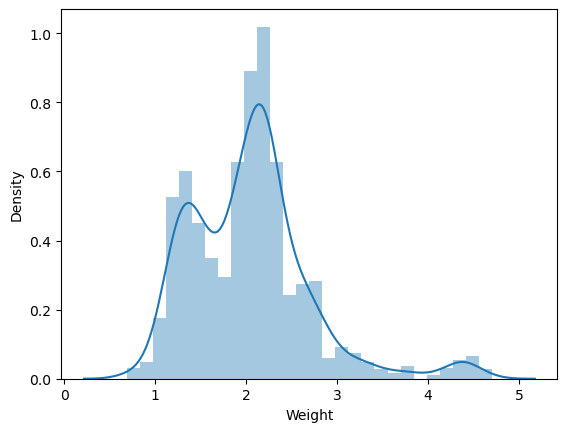

In [74]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

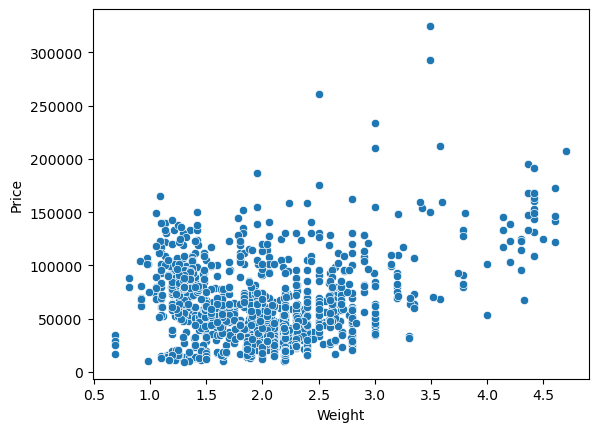

In [75]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

<Axes: >

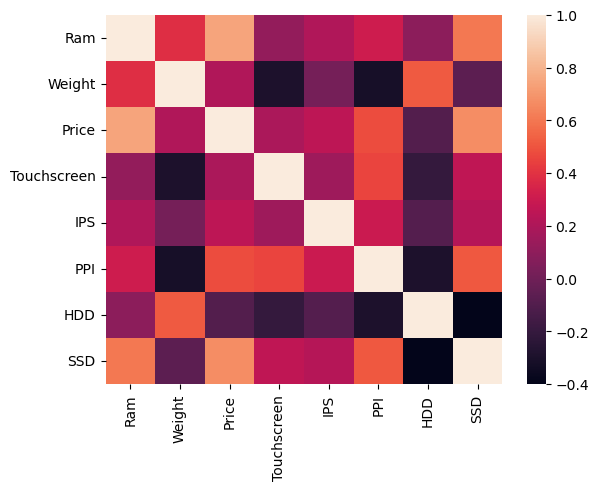

In [76]:
# check the corr relation
sns.heatmap(df.corr())

<Axes: xlabel='Price', ylabel='Density'>

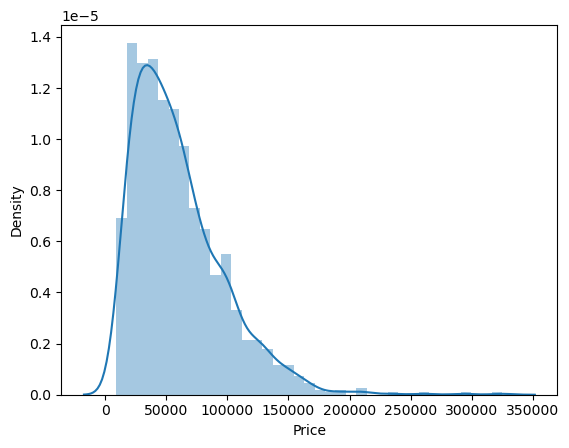

In [77]:
# finding the displot using price
sns.distplot(df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

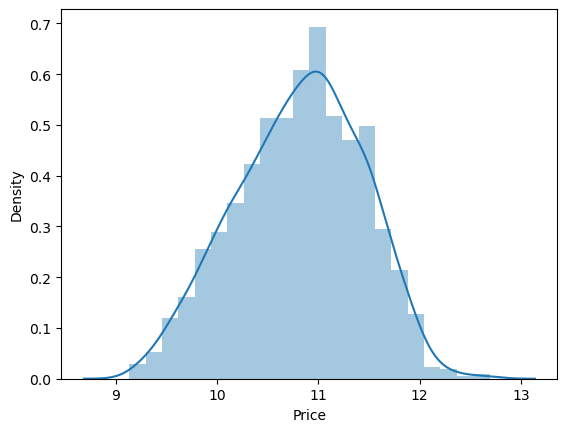

In [78]:
sns.distplot(np.log(df['Price']))

In [79]:
x=df.drop(columns=['Price'])
y=np.log(df['Price'])

## Selecting the feature for X and Y 

In [93]:
x

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,0,1,272.209528,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,153.117859,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,174.057054,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,264.476303,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,272.209528,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,193.949289,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,340.261910,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,137.986838,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,123.834341,Intel Core i7,1000,0,AMD,Windows


In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=2)

## 5.Splitting the Data into Train and Test

In [95]:
x_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu Brand,os
183,Toshiba,Notebook,8,2.00,0,0,123.834341,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,174.057054,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,166.535838,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,174.057054,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,174.057054,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,123.834341,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,174.057054,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,123.834341,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,123.834341,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


# 6. Model buildng

In [101]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=32,
                              random_state=3,
                              max_samples=0.6,
                              max_features=0.75,
                              max_depth=25
                             )

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)






Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2',
                 RandomForestRegressor(max_depth=25, max_features=0.75,
                                       max_samples=0.6, n_estimators=32,
                                       random_state=3))])

In [102]:
y_pred = pipe.predict(x_test)

In [103]:
y_pred

array([10.74454665,  9.78322572,  9.8123638 , 10.19524742, 11.25621097,
       11.44949721, 10.12230424, 10.6227677 , 11.14598972,  9.73601309,
       11.03883931, 10.85821885, 11.55745928, 10.9217063 , 11.48986409,
       11.0806051 , 11.02067511,  9.75347595, 11.50875562, 11.56073275,
       11.47684061, 11.37374862, 10.59027698, 11.00901649, 10.3345708 ,
       11.50631778, 10.95649584, 10.04948281, 10.98162382, 10.44443282,
       11.12090334, 10.08802628, 10.82545639, 10.92295164, 11.06019385,
       10.70792671, 11.12781364, 11.21652785, 11.51063588, 11.42889807,
       11.53809178, 11.18189582,  9.90542588,  9.77935015, 10.13160922,
        9.98444334, 10.86757304, 11.55411167, 11.31282917, 11.12609637,
       11.72361747, 11.52414373,  9.97255416,  9.48817211, 10.42738789,
       10.75021472, 10.01474492, 11.14063243, 10.06741792, 10.43383213,
       11.17094767, 11.03896243,  9.42020693, 11.25214602, 10.99393903,
       10.57966419, 10.01039948, 11.2832092 , 10.7158402 ,  9.79

# 7.Accuracy and Evaluation

In [109]:
pipe.score(x_train,y_train)

0.958855953851503

In [110]:
pipe.score(x_test,y_test)

0.8845355469681677